In [1]:
# Performing exploratory data analysis on a customer acquisition dataset from kaggle

# Step 1 - Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Step 2 - Load all required datasets
customer = pd.read_csv(r"C:\Users\Shailly\Documents\Bank of Maldives Internship\Customer Acquisition\CustomerAcquisition.csv")
repayment = pd.read_csv(r"C:\Users\Shailly\Documents\Bank of Maldives Internship\Customer Acquisition\Repayment.csv")
spend = pd.read_csv(r"C:\Users\Shailly\Documents\Bank of Maldives Internship\Customer Acquisition\spend.csv")

In [3]:
# Step 3 - Explore the dataset
customer.shape

(100, 8)

In [4]:
repayment.shape

(1523, 5)

In [5]:
spend.shape

(1500, 5)

In [6]:
customer.describe()

,No,Age,Limit
count,100.000000,100.000000,100.000000
mean,50.500000,46.490000,284700.610000
std,29.011492,18.282572,218494.967852
min,1.000000,12.000000,10000.000000
25%,25.750000,33.750000,100000.000000
50%,50.500000,46.500000,300001.500000
75%,75.250000,60.250000,500000.000000
max,100.000000,79.000000,500000.000000


In [7]:
repayment.describe()

,SL No:,Amount,Unnamed: 4
count,1499.00000,1500.000000,0.0
mean,751.00000,247890.054420,NaN
std,432.86834,145290.382733,NaN
min,2.00000,55.860000,NaN
25%,376.50000,118604.905000,NaN
50%,751.00000,248008.185000,NaN
75%,1125.50000,367236.890000,NaN
max,1500.00000,499930.660000,NaN


In [8]:
spend.describe()

,Sl No:,Amount
count,1500.000000,1500.000000
mean,750.500000,243096.049460
std,433.157015,141349.547367
min,1.000000,720.300000
25%,375.750000,122606.487500
50%,750.500000,239210.360000
75%,1125.250000,361617.632500
max,1500.000000,499793.490000


In [9]:
customer.head()

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary


In [10]:
repayment.head()

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN
2,3.0,A1,15-Jan-04,259490.06,NaN
3,4.0,A1,25-Jan-04,437555.12,NaN
4,5.0,A1,17-Jan-05,165972.88,NaN


In [11]:
spend.head()

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07


In [12]:
customer.dtypes

No            int64
Customer     object
Age           int64
City         object
Product      object
Limit       float64
Company      object
Segment      object
dtype: object

In [13]:
repayment.dtypes

SL No:        float64
Customer       object
Month          object
Amount        float64
Unnamed: 4    float64
dtype: object

In [14]:
spend.dtypes

Sl No:        int64
Customer     object
Month        object
Type         object
Amount      float64
dtype: object

In [15]:
# Step 4 - Clean the dataset
duplicate_rows_customer = customer[customer.duplicated()]
print("Number of duplicated rows in customer: ", duplicate_rows_customer.shape)

Number of duplicated rows in customer:  (0, 8)


In [16]:
duplicate_rows_repayment = repayment[repayment.duplicated()]
print("Number of duplicated rows in repayment: ", duplicate_rows_repayment.shape)

Number of duplicated rows in repayment:  (22, 5)


In [17]:
duplicate_rows_spend = spend[spend.duplicated()]
print("Number of duplicated rows in spend: ", duplicate_rows_spend.shape)

Number of duplicated rows in spend:  (0, 5)


In [18]:
# Drop all duplicates
customer = customer.drop_duplicates()
repayment = repayment.drop_duplicates()
spend = spend.drop_duplicates()

<AxesSubplot:>

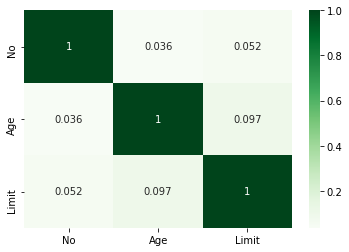

In [19]:
# We are ready to work with our dataset!! 
# Lets start by gaining some insights from the data with the help
# of basic graphs and charts

# Heatmaps - To visualize which factors are correlated to each other and to what extent
cor1 = customer.corr()
sns.heatmap(cor1, cmap = "Greens", xticklabels = cor1.columns, yticklabels = cor1.columns, annot = True)

<AxesSubplot:>

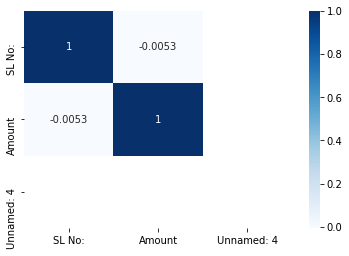

In [20]:
cor2 = repayment.corr()
sns.heatmap(cor2, cmap = "Blues", xticklabels = cor2.columns, yticklabels = cor2.columns, annot = True)

<AxesSubplot:>

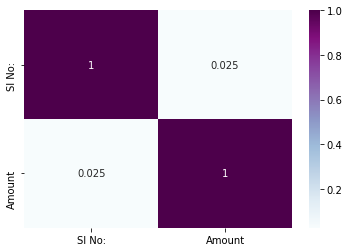

In [21]:
cor3 = spend.corr()
sns.heatmap(cor3, cmap = "BuPu", xticklabels = cor3.columns, yticklabels = cor3.columns, annot = True)

In [22]:
# To understand our further insights better, let's calculate the number of unique customers

print("Number of unique customers: ", customer.Customer.nunique())

Number of unique customers:  100


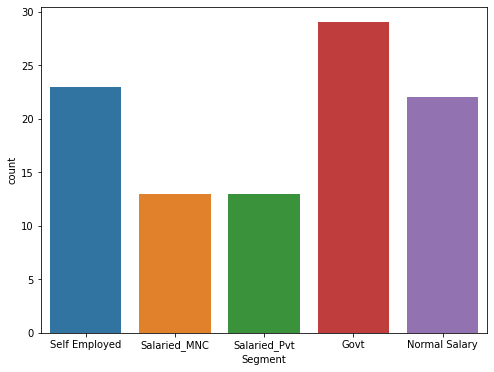

In [23]:
# Let's plot how many unique segments are present along with their customer distribution

plt.figure(figsize=(8,6))
sns.countplot(x = 'Segment', data = customer)
plt.show()

In [24]:
# Let's calculate the average monthly spend by customers

# First lets convert the date in the spend file to YYYY-MM-DD
spend['Month'] = pd.to_datetime(spend['Month'])
spend.head()

,Sl No:,Customer,Month,Type,Amount
0,1,A1,2004-01-12,JEWELLERY,485470.80
1,2,A1,2004-01-03,PETRO,410556.13
2,3,A1,2004-01-15,CLOTHES,23740.46
3,4,A1,2004-01-25,FOOD,484342.47
4,5,A1,2005-01-17,CAMERA,369694.07


In [25]:
# Because we need to find the monthly spend, we will add two new columns to spend which depict Month and Year

spend['Monthly'] = spend['Month'].apply(lambda x: pd.Timestamp.strftime(x, format = '%B'))
spend['Yearly'] = spend['Month'].apply(lambda x: pd.Timestamp.strftime(x, format = '%Y'))
spend.head()

,Sl No:,Customer,Month,Type,Amount,Monthly,Yearly
0,1,A1,2004-01-12,JEWELLERY,485470.80,January,2004
1,2,A1,2004-01-03,PETRO,410556.13,January,2004
2,3,A1,2004-01-15,CLOTHES,23740.46,January,2004
3,4,A1,2004-01-25,FOOD,484342.47,January,2004
4,5,A1,2005-01-17,CAMERA,369694.07,January,2005


In [26]:
# Now we need to group the data on the basis of the "Monthly" and "Yearly" columns

Monthly_Customer_Spend = round(spend.groupby(['Yearly', 'Monthly']).mean(),2)
Monthly_Customer_Spend

Sl No:     Amount
Yearly Monthly                     
2004   April      730.50  235272.04
       February   749.50  221215.27
       January    751.62  251712.07
       March      725.50  232146.12
       May        733.50  217539.24
       November   745.50  270486.40
       September  741.50  310923.38
2005   April      730.00  252181.33
       August     749.50  233734.63
       December   762.50  147503.06
       February   750.67  229802.28
       January    746.50  292741.37
       July       757.50  229116.66
       June       755.50  262688.11
       May        747.30  245696.52
       November   749.50  286143.32
       October    760.50  194568.64
       September  759.50  188666.20
2006   April      744.41  232468.97
       August     770.50  240699.72
       December   774.50  270470.98
       February   757.83  253858.26
       January    763.50  282058.01
       July       754.50  287505.10
       June       768.50  177252.39
       March      750.90  247166.08
       May        744.25  236162.74
       November   758.50  182841.29
       October    772.50  236136.33
       September  771.50  158520.09

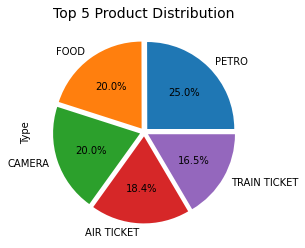

In [27]:
# Let's plot what are the top 5 products by customers.

spend['Type'].value_counts().head(5).plot(kind = 'pie', autopct = "%.1f%%", explode=[0.05]*5)
plt.title("Top 5 Product Distribution", fontsize=14);
plt.show()

In [28]:
# Let's plot the cities' spend

spend.head()

,Sl No:,Customer,Month,Type,Amount,Monthly,Yearly
0,1,A1,2004-01-12,JEWELLERY,485470.80,January,2004
1,2,A1,2004-01-03,PETRO,410556.13,January,2004
2,3,A1,2004-01-15,CLOTHES,23740.46,January,2004
3,4,A1,2004-01-25,FOOD,484342.47,January,2004
4,5,A1,2005-01-17,CAMERA,369694.07,January,2005


In [29]:
customer.head()

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary


In [30]:
# As we can see Customer City and Customer Amount are not in the same table.
# Let's merge the two to serve our purpose

customer_spend = pd.merge(left = customer, right = spend, on = "Customer", how = "inner")
customer_spend.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,Monthly,Yearly
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,January,2004
1,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13,January,2004
2,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,3,2004-01-15,CLOTHES,23740.46,January,2004
3,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,4,2004-01-25,FOOD,484342.47,January,2004
4,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,5,2005-01-17,CAMERA,369694.07,January,2005


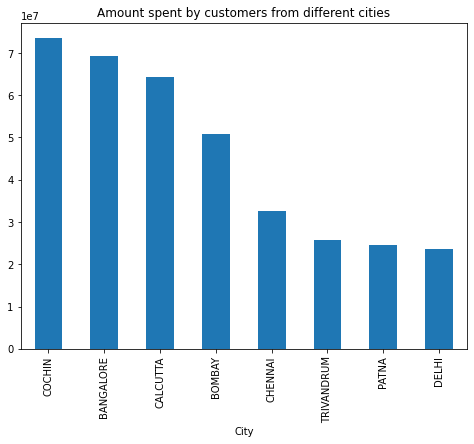

In [31]:
# Now we can plot each city's spend by grouping City and Amount

city_spend = customer_spend.groupby("City")["Amount"].sum().sort_values(ascending = False)
plt.figure(figsize=(8,6))
city_spend.plot(kind="bar")
plt.title("Amount spent by customers from different cities")
plt.show()

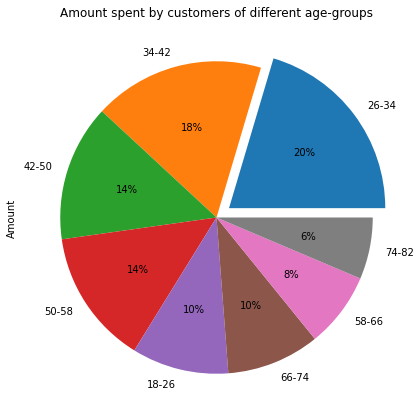

In [32]:
# Let's find out which age group spends the most.

# Firstly, we need to adjust the ages below 18 to be the mean age.
customer.loc[customer["Age"] < 18,"Age"] = customer["Age"].mean()

# We already have a table that has customer and spend tables merged but we don't have a column which groups the age groups.

# Lets create a column "Age group" - ranging between 18-82 into 8 bins
customer_spend["Age Group"] =  pd.cut(customer_spend["Age"], bins = np.arange(18,88,8), labels = ["18-26","26-34", "34-42" ,"42-50" ,"50-58","58-66","66-74","74-82"], include_lowest=True)

age_spend = customer_spend.groupby("Age Group")["Amount"].sum().sort_values(ascending = False)

plt.figure(figsize=(7,10))
age_spend.plot(kind="pie", autopct = "%1.0f%%", explode=[0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0])
plt.title("Amount spent by customers of different age-groups")
plt.show()

In [33]:
# Find out the top 10 customers in terms of repayment.

# Let's make a table that merges customer table and repayment table
customer_repayment = pd.merge(left = customer, right = repayment, on = "Customer", how = "inner")

# Now we group to find top 10 customers
customer_repayment.groupby("Customer")[["Amount"]].sum().sort_values(by = "Amount", ascending = False).head(10)

,Amount
Customer,
A61,10539142.91
A60,9876290.74
A13,9572000.66
A22,9372561.68
A21,9056336.15
A43,8489871.46
A45,8448334.87
A12,8334760.16
A48,8292416.75


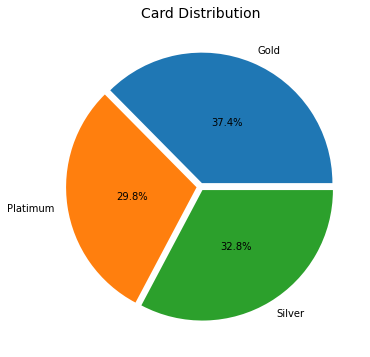

In [34]:
# Let's plot the distribution of card-type amongst customers
labelSize = customer.groupby("Product")["No"].sum()
pie, ax = plt.subplots(figsize=[10,6])
labels = labelSize.keys()
plt.pie(x = labelSize, autopct = "%.1f%%", explode=[0.03]*3, labels = labels, pctdistance = 0.5)
plt.title("Card Distribution", fontsize=14);

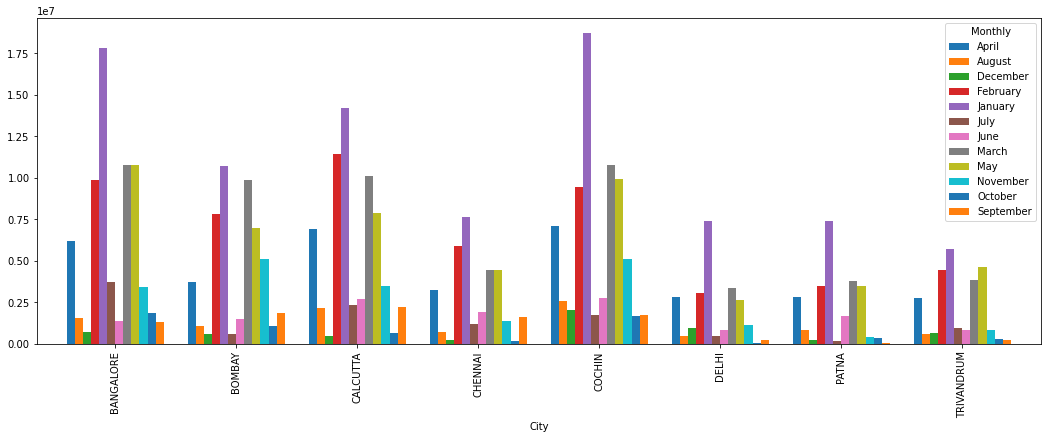

In [35]:
# Let's plot a graph to visualise the monthly city-wise spend of customers

customer_spend['Monthly'] = customer_spend['Month'].apply(lambda x: pd.Timestamp.strftime(x, format = "%B"))
month_city = customer_spend.groupby(["Monthly", "City"])[["Amount"]].sum().sort_index().reset_index()
month_city = pd.pivot_table(data = customer_spend, values = "Amount", index = "City", columns = "Monthly", aggfunc = "sum")
month_city.plot(kind = "bar", figsize = (18,6), width = 0.8)
plt.show()

In [ ]:
# We can do lot more with this dataset. E.g.-  the months different cities see the most spent or months when customers buy travel tickets the most etc.